# ＭＸＳ読売３３３日株 週足

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import psar

In [3]:
code = '348A'
symbol = '%s.T' % code
ticker = yf.Ticker(symbol)

In [4]:
# 週足で過去 2 年分のデータを取得
df = ticker.history(period='2y', interval='1wk')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-11-24 00:00:00+09:00,246.100006,246.100006,238.699997,244.699997,124150,0.0,0.0,0.0
2025-12-01 00:00:00+09:00,245.899994,245.899994,241.300003,243.899994,119740,0.0,0.0,0.0
2025-12-08 00:00:00+09:00,243.899994,248.000000,243.000000,248.000000,117450,0.0,0.0,0.0
2025-12-15 00:00:00+09:00,248.000000,248.899994,240.000000,246.899994,394010,0.0,0.0,0.0
2025-12-22 00:00:00+09:00,245.100006,250.000000,245.100006,247.800003,142490,0.0,0.0,0.0


In [5]:
dt = df.tail(1).index[0]
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'1222'

## ローソク足チャートと出来高

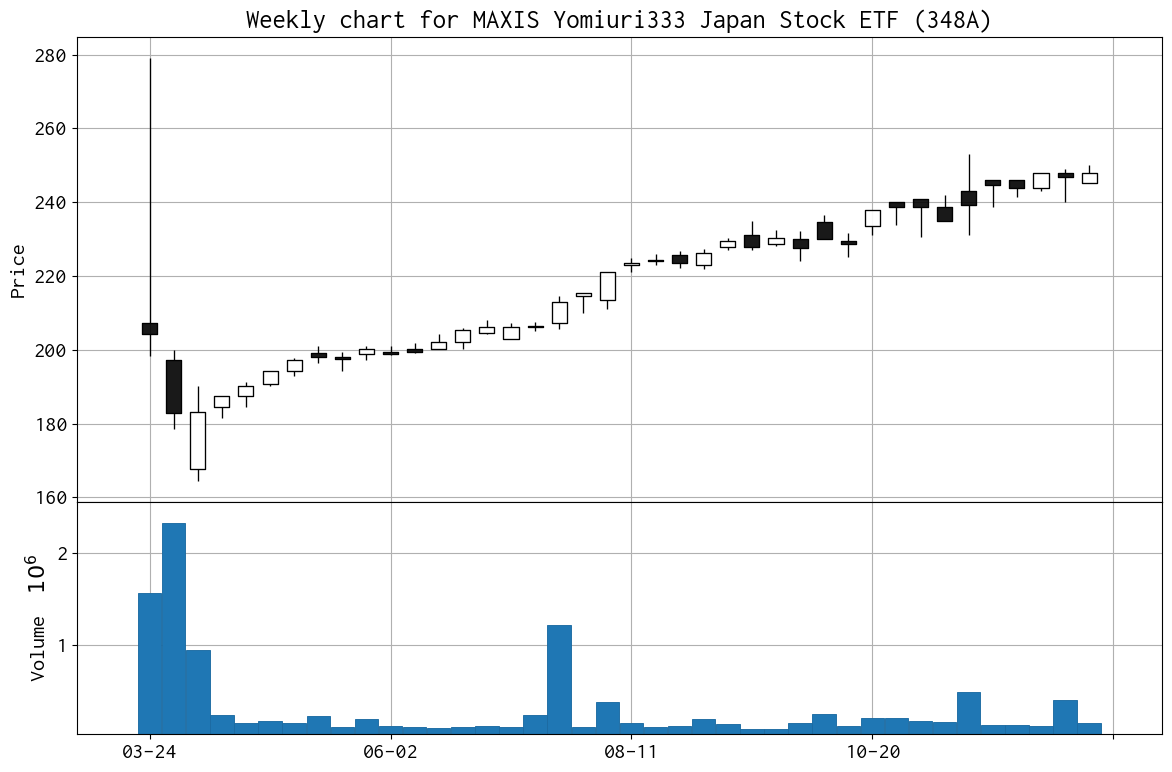

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mpf.plot(df, type='candle', style='default', volume=ax[1], datetime_format='%m-%d', xrotation=0, ax=ax[0])

try:
    ax[0].set_title('Weekly chart for %s (%s)' % (ticker.info['longName'], code))
except KeyError:
    ax[0].set_title('Daily chart for %s' % code)


plt.tight_layout()
plt.savefig(f"{date_str}_report_yomiuri333_ETF_weekly_{code}.png")
plt.show()

In [7]:
df.tail(2)['Close']

Date
2025-12-15 00:00:00+09:00    246.899994
2025-12-22 00:00:00+09:00    247.800003
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-12-15 00:00:00+09:00         NaN
2025-12-22 00:00:00+09:00    0.900009
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(5).median().tail(2)

Date
2025-12-15 00:00:00+09:00    244.699997
2025-12-22 00:00:00+09:00    246.899994
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(25).median().tail(2)

Date
2025-12-15 00:00:00+09:00    228.600006
2025-12-22 00:00:00+09:00    229.600006
Name: Close, dtype: float64

## ヒストグラムと Q-Q プロット

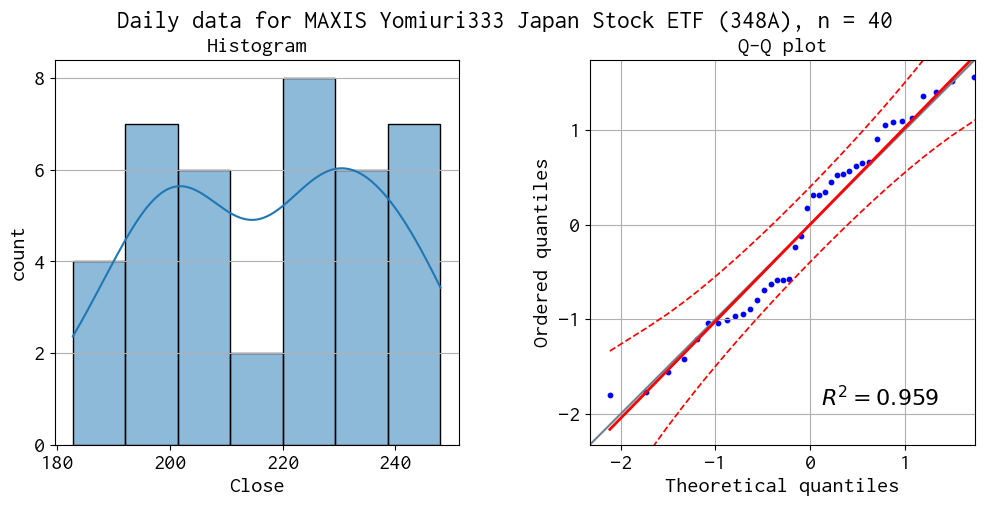

In [11]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

try:
    plt.suptitle('Daily data for %s (%s), n = %d' % (ticker.info['longName'], code, len(df)), fontsize=18)
except KeyError:
    plt.suptitle('Daily data for %s, n = %d' % (symbol, len(df)), fontsize=18)

plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{date_str}_report_weekly_histogram_qqplot_{code}.png")
plt.show()